In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os 
from matplotlib.tri import  TriAnalyzer,CubicTriInterpolator, Triangulation
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Path to the data
PATH = "data/Cetex_TC1000_0°"

In [31]:
positions = []

# Number of files to read
n_files = len([f for f in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, f))])

# Iterate over files
for n in range(1, n_files):
    dic_file = f"{PATH}/Flächenkomponente 1_{n:04d}.csv"
    pos = np.loadtxt(dic_file, skiprows=9, delimiter=";")[:, 1:4]
    if len(positions) > 0:
        if pos.shape[0] != positions[0].shape[0]:
            print(f"Dropping {dic_file} due to lost facets.")
            continue
    positions.append(pos)


Dropping data/Cetex_TC1000_0°/Flächenkomponente 1_0176.csv due to lost facets.
Dropping data/Cetex_TC1000_0°/Flächenkomponente 1_0257.csv due to lost facets.
Dropping data/Cetex_TC1000_0°/Flächenkomponente 1_0484.csv due to lost facets.
Dropping data/Cetex_TC1000_0°/Flächenkomponente 1_0487.csv due to lost facets.


In [32]:
N = len(positions)

def plot_surface(n):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(positions[n][:, 0], positions[n][:, 1], positions[n][:, 2], c='r', marker='o')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

widgets.interact(plot_surface,n=widgets.IntSlider(value=N-1, min=0, max=N-1, step=1))

interactive(children=(IntSlider(value=1356, description='n', max=1356), Output()), _dom_classes=('widget-inter…

<function __main__.plot_surface(n)>

In [33]:
curvature_x = []
curvature_y = []
for pos in positions:
    # Build a triangulation
    tri = Triangulation(pos[:,0], pos[:,1])
    mask = TriAnalyzer(tri).get_flat_tri_mask(.01)
    tri.set_mask(mask)

    # Gradient
    z = CubicTriInterpolator(tri, pos[:,2])
    z_x, z_y = z.gradient(tri.x, tri.y)

    # Hessian
    z_x = CubicTriInterpolator(tri, z_x) 
    z_xx, z_xy = z_x.gradient(tri.x, tri.y)
    z_y = CubicTriInterpolator(tri, z_y) 
    z_yx, z_yy = z_y.gradient(tri.x, tri.y)

    curvature_x.append(np.mean(z_xx))
    curvature_y.append(np.mean(z_yy))

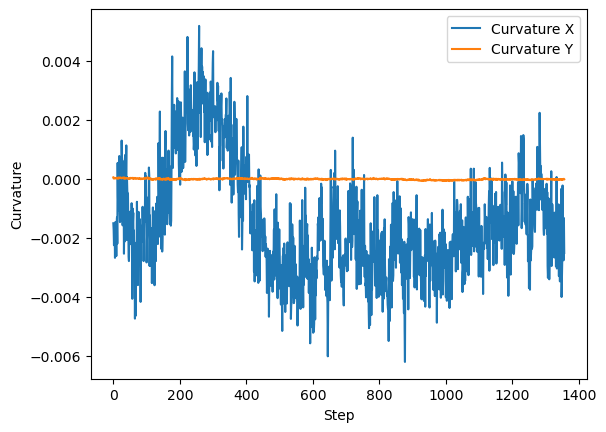

In [34]:
plt.plot(curvature_x, label="Curvature X")
plt.plot(curvature_y, label="Curvature Y")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Curvature")
plt.show()